In [1]:
import json
import PIL
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import urllib

In [2]:
PIL.__version__

'6.2.0'

In [2]:
xy = [199.84, 200.46, 77.71, 70.88]

In [3]:
# ImageDraw.draw_rectangle(xy, fill=None, outline=None, width=1)
# d = ImageDraw.Draw(image)
# # d.multiline_text((10,10), "Mitra", font=fnt, fill=(0, 0, 0))
# d.multiline_text((10,10), "Mitra", fill=(0, 0, 0))

In [8]:
def annotate_image(image_file, xy):
    im = Image.open(image_file)
    xy2 = [xy[0], xy[1]]
    xy3 = [xy[2], xy[3]]
#     display(xy)
    if xy2[0]>xy3[0]:
        xy_a = xy3
        width = xy2[0] - xy3[0]
        height = xy2[1] - xy3[1]
    else:
        xy_a = xy2
        width = xy3[0] - xy2[0]
        height = xy3[1] - xy2[1]
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    rect = patches.Rectangle(tuple(xy_a), width, height, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.axis('off')
    plt.show()

In [9]:
def annotate_image2(image_file, xy):
    im = Image.open(image_file)
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(im)

    for xy1 in xy:
        xscale= 0.531
        yscale=0.638
        xy2 = [xy1[0]*xscale, xy1[1]*yscale]
        xy3 = [xy1[2]*xscale, xy1[3]*yscale]
        xy_a = xy2
        width = (xy2[0] - xy3[0])
        height = xy2[1] - xy3[1]
#                 0.638
# 0.531

    #     display(xy)
#         if xy2[0]>xy3[0]:
#             xy_a = xy3
#             width = xy2[0] - xy3[0]
#             height = xy2[1] - xy3[1]
#         else:
#             xy_a = xy2
#             width = xy3[0] - xy2[0]
#             height = xy3[1] - xy2[1]

        # Create a Rectangle patch
        rect = patches.Rectangle(tuple(xy_a), width, height, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
    plt.axis('off')
    plt.show()

In [10]:
annotate_image('images/COCO_val2014_000000558840.jpg', [199.84, 200.46, 77.71, 70.88])

FileNotFoundError: [Errno 2] No such file or directory: 'images/COCO_val2014_000000558840.jpg'

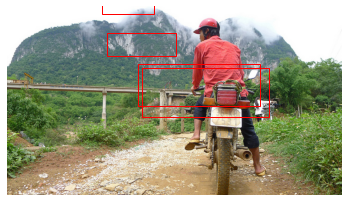

In [11]:
annotate_image2('images/COCO_val2014_000000391895.jpg', [[359.17, 146.17, 112.45, 213.57],
  [339.88, 22.16, 153.88, 300.73],
  [471.64, 172.82, 35.92, 48.1],
  [486.01, 183.31, 30.63, 34.98]])

In [19]:
all_images[0]

NameError: name 'all_images' is not defined

In [18]:
counter = 0
for img in all_images:
    if counter >= 100:
        break
    counter +=1
    image_url = img["coco_url"]
    image_name = image_url.split("/")[-1]
    download = urllib.request.URLopener()
    download.retrieve(image_url, "images/"+image_name)
    
image_url, image_name

NameError: name 'all_images' is not defined

In [14]:
# display(image)

In [15]:
# !pip install Pillow

In [16]:
with open('annotations/instances_val2014.json') as f:
    data = json.load(f)

In [17]:
print(type(data))

<class 'dict'>


In [5]:
print(data.keys())

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])


In [31]:
bboxes = {}
for x in data['annotations']:
    if x["image_id"] not in bboxes:
        bboxes[x["image_id"]] = []
    bboxes[x["image_id"]].append(x["bbox"])

In [32]:
len(bboxes[391895])

4

In [40]:
all_images = []

for item in data['images']:
    image_id = int(item["id"])
    if image_id in bboxes:
        #print(image_id)
        item["bboxes"] = bboxes[image_id]
        all_images.append(item)

In [41]:
all_images2 = []

for item in data['images']:
    d = {"coco_url": item["coco_url"]}
    image_id = int(item["id"])
    if image_id in bboxes:
        #print(image_id)
        d["bboxes"] = bboxes[image_id]
        all_images2.append(d)

In [43]:
all_images[0]

{'license': 3,
 'file_name': 'COCO_val2014_000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895,
 'bboxes': [[359.17, 146.17, 112.45, 213.57],
  [339.88, 22.16, 153.88, 300.73],
  [471.64, 172.82, 35.92, 48.1],
  [486.01, 183.31, 30.63, 34.98]]}

In [44]:
all_images2[0]

{'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
 'bboxes': [[359.17, 146.17, 112.45, 213.57],
  [339.88, 22.16, 153.88, 300.73],
  [471.64, 172.82, 35.92, 48.1],
  [486.01, 183.31, 30.63, 34.98]]}

In [14]:
data["images"][0]

{'license': 3,
 'file_name': 'COCO_val2014_000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [ ]:
# images[391895] = 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg'

In [18]:
images = {}
for item in data['images']:
    images[item["id"]] = item["coco_url"]

In [107]:
## Me:
annotations = []

for x in data['annotations']:
    tid = int(x["id"])
    if tid in bboxes:
        #print(tid)
        x["coco_url"] = bboxes[tid]
        annotations.append(x)

In [109]:
print (annotations[:5])

[{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156, 'coco_url': [199.84, 200.46, 77.71, 70.88]}, {'segmentation': [[247.71, 354.7, 253.49, 346.99, 276.63, 337.35, 312.29, 333.49, 364.34, 331.57, 354.7, 327.71, 369.16, 325.78, 376.87, 333.49, 383.61, 330.6, 379.76, 321.93, 365.3, 320.0, 356.63, 317.11, 266.02, 331.57, 260.24, 334.46, 260.24, 337.35, 242.89, 338.31, 234.22, 338.31, 234.22, 348.92, 239.04, 353.73, 248.67, 355.66, 252.53, 353.73]], 'area': 1545.4213000000007, 'iscrowd': 0, 'image_id': 200365, 'bbox': [234.22, 317.11, 149.39, 38.55], 'category_id': 58, 'id': 509, 'coco_url': [234.22, 317.11, 149.39, 38.55]}, {'segmentation': [[274.58, 405.68, 298.32, 405.68, 302.45, 402.58, 333.42, 404.65, 356.13, 397.

In [6]:
type(data["annotations"])

list

In [15]:
data['annotations'][0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

In [23]:
annotations = []

for item in data['annotations']:
    image_id = int(item["image_id"])
    if image_id in images:
        #print(image_id)
        item["coco_url"] = images[image_id]
        annotations.append(item)

In [24]:
len(data['images']), len(data['annotations']), len(annotations)

(40504, 291875, 291875)

In [114]:
len(data['images']), len(data['annotations']), len(annotations)

(40504, 291875, 291875)

In [9]:
print(data['images'][0].keys())

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])


In [12]:
print(data['annotations'][0])

{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}


In [89]:
print(data["annotations"][0].keys())

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id', 'coco_url'])


In [13]:
print(json.dumps(data["annotations"][0], indent=4))

{
    "segmentation": [
        [
            239.97,
            260.24,
            222.04,
            270.49,
            199.84,
            253.41,
            213.5,
            227.79,
            259.62,
            200.46,
            274.13,
            202.17,
            277.55,
            210.71,
            249.37,
            253.41,
            237.41,
            264.51,
            242.54,
            261.95,
            228.87,
            271.34
        ]
    ],
    "area": 2765.1486500000005,
    "iscrowd": 0,
    "image_id": 558840,
    "bbox": [
        199.84,
        200.46,
        77.71,
        70.88
    ],
    "category_id": 58,
    "id": 156
}


In [91]:
print(type(data["annotations"]))

<class 'list'>


In [92]:
print(type(data["annotations"][0].keys()))

<class 'dict_keys'>


In [93]:
print(type(data["annotations"][0]["bbox"]))

<class 'list'>


In [94]:
print(data["annotations"][0]["bbox"])

[199.84, 200.46, 77.71, 70.88]
